In [1]:
import tensorflow as tf
from tensorflow import keras

***Splitting the data***

In [2]:
datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.20,
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rescale=1./255 
)

Creating subset for training & validation data

In [3]:
train_ds = datagen.flow_from_directory(
    '/kaggle/input/weather-dataset/dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_ds = datagen.flow_from_directory(
    '/kaggle/input/weather-dataset/dataset', # same directory as training data
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [4]:
new_dict = {0: 'dew', 1: 'fogsmog', 2: 'frost', 3: 'glaze', 4: 'hail', 5: 'lightning', 6: 'rain', 7: 'rainbow', 8: 'rime', 9:'sandstorm', 10: 'snow'}

In [5]:
predictions = {}

In [6]:
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

***Defining & declaring the model with the layers which are included***

In [7]:
IMG_SHAPE = (128,128, 3)

mobilenet=keras.applications.MobileNet(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

model = Sequential([
    mobilenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                         

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

***Fitting the model to our data***

In [9]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

predictions['MobileNet'] = model.evaluate(val_ds)

Epoch 1/50
172/172 [==============================] - 101s 468ms/step - loss: 0.8174 - accuracy: 0.7404 - val_loss: 12.4460 - val_accuracy: 0.1242
Epoch 2/50
172/172 [==============================] - 44s 256ms/step - loss: 0.5607 - accuracy: 0.8221 - val_loss: 4.9122 - val_accuracy: 0.2235
Epoch 3/50
172/172 [==============================] - 44s 256ms/step - loss: 0.4581 - accuracy: 0.8504 - val_loss: 1.6596 - val_accuracy: 0.5749
Epoch 4/50
172/172 [==============================] - 43s 251ms/step - loss: 0.3810 - accuracy: 0.8822 - val_loss: 0.8617 - val_accuracy: 0.7451
Epoch 5/50
172/172 [==============================] - 43s 252ms/step - loss: 0.2813 - accuracy: 0.9077 - val_loss: 0.5889 - val_accuracy: 0.8327
Epoch 6/50
172/172 [==============================] - 43s 248ms/step - loss: 0.2815 - accuracy: 0.9099 - val_loss: 0.7678 - val_accuracy: 0.7896
Epoch 7/50
43/43 [==============================] - 8s 183ms/step - loss: 0.9919 - accuracy: 0.7874


***Accuracy for the Model(MobileNet)***

In [10]:
for prediction in predictions.items():
    print(f"""{prediction[0]}: {round((prediction[1][1] * 100),2)}%""")

MobileNet: 78.74%


***Giving input to the trained model***

In [11]:
image_path = '/kaggle/input/weather-dataset/dataset/rainbow/0595.jpg'

In [12]:
import cv2
import numpy as np
image = cv2.imread(str(image_path))
image_resized = cv2.resize(image,(128,128))
image = np.expand_dims(image_resized, axis = 0)
print(image.shape)

(1, 128, 128, 3)


In [13]:
pred = model.predict(image)

1/1 [==============================] - 1s 526ms/step


Showing prediction of given image

The image is classified as rainbow


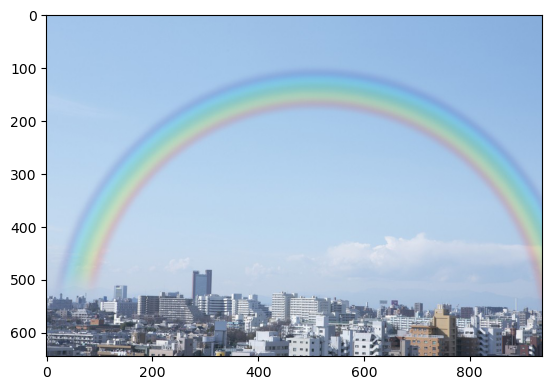

In [14]:
output_class = new_dict[np.argmax(pred)]
print(f"The image is classified as {output_class}")

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()